In [1]:
import numpy as np 
import scipy.stats as sp
import astropy.table as atable

In [2]:
import h5py

In [3]:
import corner as DFM
import matplotlib.pyplot as plt

In [4]:
rockstar = atable.Table.read('/tigress/chhahn/CAMELS/Sims/IllustrisTNG/LH_0/hlists/hlist_1.00000.list', format='ascii')

In [5]:
rockstar.columns

<TableColumns names=('scale(0)','id(1)','desc_scale(2)','desc_id(3)','num_prog(4)','pid(5)','upid(6)','desc_pid(7)','phantom(8)','sam_Mvir(9)','Mvir(10)','Rvir(11)','rs(12)','vrms(13)','mmp?(14)','scale_of_last_MM(15)','vmax(16)','x(17)','y(18)','z(19)','vx(20)','vy(21)','vz(22)','Jx(23)','Jy(24)','Jz(25)','Spin(26)','Breadth_first_ID(27)','Depth_first_ID(28)','Tree_root_ID(29)','Orig_halo_ID(30)','Snap_idx(31)','Next_coprogenitor_depthfirst_ID(32)','Last_progenitor_depthfirst_ID(33)','Last_mainleaf_depthfirst_ID(34)','Tidal_Force(35)','Tidal_ID(36)','Rs_Klypin(37)','Mvir_all(38)','M200b(39)','M200c(40)','M500c(41)','M2500c(42)','Xoff(43)','Voff(44)','Spin_Bullock(45)','b_to_a(46)','c_to_a(47)','A[x](48)','A[y](49)','A[z](50)','b_to_a(500c)(51)','c_to_a(500c)(52)','A[x](500c)(53)','A[y](500c)(54)','A[z](500c)(55)','T/|U|(56)','M_pe_Behroozi(57)','M_pe_Diemer(58)','Type(59)','SM(60)','Gas(61)','BH_Mass(62)','Macc(63)','Mpeak(64)','Vacc(65)','Vpeak(66)','Halfmass_Scale(67)','Acc_Rate_Ins

```
#Scale: Scale factor of halo.
#ID: ID of halo (unique across entire simulation).
#Desc_Scale: Scale of descendant halo, if applicable.
#Descid: ID of descendant halo, if applicable.
#Num_prog: Number of progenitors.
#Pid: ID of least massive host halo (-1 if distinct halo).
#Upid: ID of most massive host halo (different from Pid when the halo is within two or more larger halos).
#Desc_pid: Pid of descendant halo (if applicable).
#Phantom: Nonzero for halos interpolated across timesteps.
#SAM_Mvir: Halo mass, smoothed across accretion history; always greater than sum of halo masses of contributing progenitors (Msun/h).  Only for use with select semi-analytical models.
#Mvir: Halo mass (Msun/h).
#Rvir: Halo radius (kpc/h comoving).
#Rs: Scale radius (kpc/h comoving).
#Vrms: Velocity dispersion (km/s physical).
#mmp?: whether the halo is the most massive progenitor or not.
#scale_of_last_MM: scale factor of the last major merger (Mass ratio > 0.3).
#Vmax: Maxmimum circular velocity (km/s physical).
#X/Y/Z: Halo position (Mpc/h comoving).
#VX/VY/VZ: Halo velocity (km/s physical, peculiar).
#JX/JY/JZ: Halo angular momenta ((Msun/h) * (Mpc/h) * km/s (physical)).
#Spin: Halo spin parameter.
#Breadth_first_ID: breadth-first ordering of halos within a tree.
#Depth_first_ID: depth-first ordering of halos within a tree.
#Tree_root_ID: ID of the halo at the last timestep in the tree.
#Orig_halo_ID: Original halo ID from halo finder.
#Snap_idx: Index of snapshot (in original snapshot list) from which halo originated.
#Next_coprogenitor_depthfirst_ID: Depthfirst ID of next coprogenitor.
#Last_progenitor_depthfirst_ID: Depthfirst ID of last progenitor.
#Last_mainleaf_depthfirst_ID: Depthfirst ID of last progenitor on main progenitor branch.
#Tidal_Force: Strongest tidal force from any nearby halo, in dimensionless units (Rhalo / Rhill).
#Tidal_ID: ID of halo exerting strongest tidal force.
#Rs_Klypin: Scale radius determined using Vmax and Mvir (see Rockstar paper)
#Mvir_all: Mass enclosed within the specified overdensity, including unbound particles (Msun/h)
#M200b--M2500c: Mass enclosed within specified overdensities (Msun/h)
#Xoff: Offset of density peak from average particle position (kpc/h comoving)
#Voff: Offset of density peak from average particle velocity (km/s physical)
#Spin_Bullock: Bullock spin parameter (J/(sqrt(2)*GMVR))
#b_to_a, c_to_a: Ratio of second and third largest shape ellipsoid axes (B and C) to largest shape ellipsoid axis (A) (dimensionless).
#  Shapes are determined by the method in Allgood et al. (2006).
#  (500c) indicates that only particles within R500c are considered.
#A[x],A[y],A[z]: Largest shape ellipsoid axis (kpc/h comoving)
#T/|U|: ratio of kinetic to potential energies
#M_pe_*: Pseudo-evolution corrected masses (very experimental)
#Consistent Trees Version 1.01
#Macc,Vacc: Mass and Vmax at accretion.
#Mpeak,Vpeak: Peak mass and Vmax over mass accretion history.
#Halfmass_Scale: Scale factor at which the MMP reaches 0.5*Mpeak.
#Acc_Rate_*: Halo mass (or log10 vmax) accretion rates in Msun/h/yr (or dex/yr).
#            Inst: instantaneous; 100Myr: averaged over past 100Myr,
#            X*Tdyn: averaged over past X*virial dynamical time.
#            Mpeak: Growth Rate of Mpeak, averaged from current z to z+0.5
#            Log_Vmax: Growth Rate of Log10(Vmax)
#Mpeak_Scale: Scale at which Mpeak was reached.
#Acc_Scale: Scale at which satellites were (last) accreted.
#First_Acc_Scale: Scale at which current and former satellites first passed through a larger halo.
#First_Acc_(Mvir|Vmax): Mvir and Vmax at First_Acc_Scale.
#Vmax@Mpeak: Halo Vmax at the scale at which Mpeak was reached.
#Tidal_Force_Tdyn: Dimensionless tidal force averaged over past dynamical time.
#Log_(Vmax/Vmax_max(Tdyn;TMpeak)): Log10 of Vmax_now over Vmax@(Tdyn ago) OR Vmax@Mpeak (if and only if Mpeak happened > 1Tdyn ago).
#Time_to_future_merger: Time (in Gyr) until the given halo merges into a larger halo.  (-1 if no future merger happens)
#Future_merger_MMP_ID: most-massive progenitor of the halo into which the given halo merges. (-1 if the main progenitor of the future merger halo does not exist at the given scale factor.)
```

In [6]:
rockstar['logMvir'] = np.log10(rockstar['Mvir(10)'])
rockstar['M_star'] = rockstar['SM(60)']
rockstar['logMstar'] = np.log10(rockstar['M_star'])
rockstar['concentration'] = rockstar['Rvir(11)'] / rockstar['rs(12)']

/home/chhahn/.conda/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# calculate number of subhalos in halo
satellites = (rockstar['upid(6)'] != -1) & (rockstar['M_star'] > 0)
upid, n_upid = np.unique(rockstar[satellites]['upid(6)'], return_counts=True)

_tab = atable.Table()
_tab['id(1)'] = upid
_tab['numSubStruct'] = n_upid

rockstar = atable.join(rockstar, _tab, keys='id(1)', join_type='left')
rockstar['numSubStruct'][rockstar['numSubStruct'].mask] = 0

In [8]:
# calculate number of subhalos in halo
satellites_logmcut = (rockstar['upid(6)'] != -1) & (rockstar['M_star'] > 1e9)
upid, n_upid = np.unique(rockstar[satellites_logmcut]['upid(6)'], return_counts=True)

_tab = atable.Table()
_tab['id(1)'] = upid
_tab['numSubStruct_Mstar1e9'] = n_upid

rockstar = atable.join(rockstar, _tab, keys='id(1)', join_type='left')
rockstar['numSubStruct_Mstar1e9'][rockstar['numSubStruct_Mstar1e9'].mask] = 0

In [9]:
is_halo = (rockstar['pid(5)'] == -1) # halo not a subhalo 
halos = rockstar[is_halo]

In [10]:
has_galaxy = (halos['M_star'] > 0)

# halos with central galaxies
ncen_h = np.zeros(len(halos))
ncen_h[has_galaxy] = 1.

has_massive_galaxy = (halos['M_star'] > 1e9)
ncen_logmcut_h = np.zeros(len(halos))
ncen_logmcut_h[has_massive_galaxy] = 1.

nsat_h = halos['numSubStruct']
nsat_logmcut_h = halos['numSubStruct_Mstar1e9']

In [11]:
ncen_mh, mh_edges, _ = sp.binned_statistic(halos['logMvir'], ncen_h, bins=30, range=(8., 14))
ncen_mh_logmcut, _, _ = sp.binned_statistic(halos['logMvir'], ncen_logmcut_h, bins=30, range=(8., 14))
nsat_mh, mh_edges, _ = sp.binned_statistic(halos['logMvir'], nsat_h, bins=30, range=(8., 14))
nsat_mh_logmcut, _, _ = sp.binned_statistic(halos['logMvir'], nsat_logmcut_h, bins=30, range=(8., 14))

(0.0, 3.0)

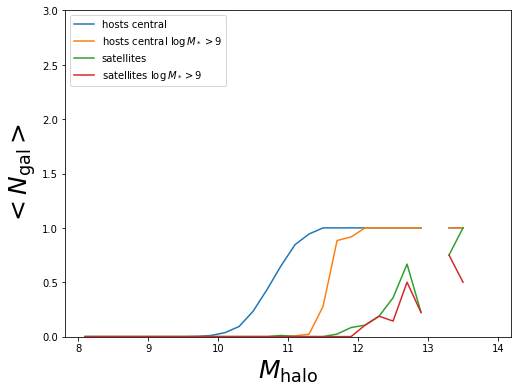

In [12]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), ncen_mh, label='hosts central')
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), ncen_mh_logmcut, label=r'hosts central $\log M_* > 9$')
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), nsat_mh, label='satellites')
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), nsat_mh_logmcut, label='satellites $\log M_* > 9$')


sub.legend(loc='upper left', fontsize=10)
sub.set_xlabel(r'$M_{\rm halo}$', fontsize=25)
sub.set_ylabel(r'$<N_{\rm gal}>$', fontsize=25)
sub.set_ylim(0., 3)

In [13]:
halo_props = np.vstack([halos[prop].data for prop in ['logMvir', 'vmax(16)', 'Spin(26)', 'Tidal_Force(35)', 'Acc_Log_Vmax_Inst(73)', 'concentration']]).T

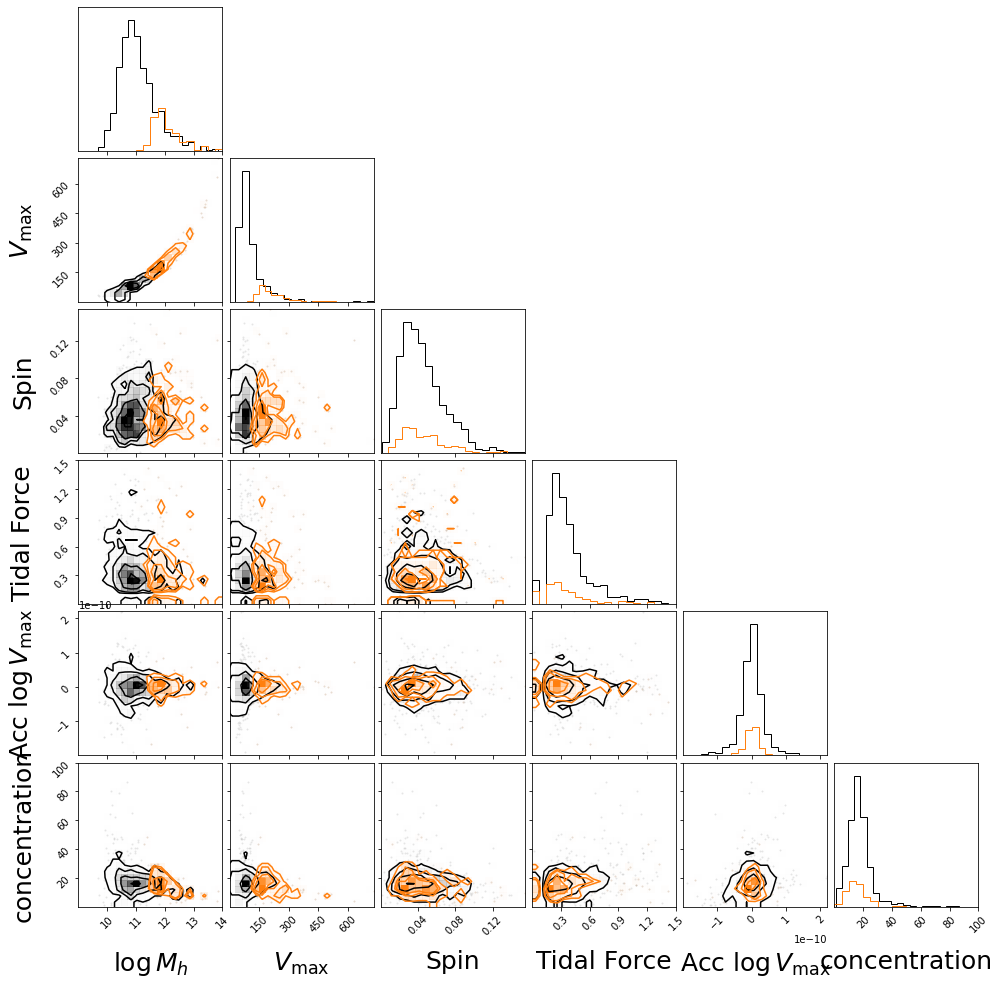

In [17]:
fig = DFM.corner(halo_props[ncen_h.astype(bool)])
_ = DFM.corner(halo_props[ncen_logmcut_h.astype(bool)], color='C1', fig=fig,
                range=[(9., 14.), (0., 600), (0., 0.15), (0., 1.5), (-2e-10, 2e-10), (0, 100)],
                labels=[r'$\log M_h$', r'$V_{\rm max}$', r'Spin', r'Tidal Force', r'Acc $\log V_{\rm max}$', r'concentration'],
                label_kwargs={'fontsize': 25})